Alumno: **Ginés González Guirado**

# Homework 12

In [66]:
import numpy as np
import matplotlib.pyplot as plt

Implemento la transformada de Fourier, en expresión compleja, utilizada en los Homeworks anteriores.

In [67]:
def ft2(v,m):
    D=np.size(v)
    N=D//2

    M=np.zeros((D,D),dtype=complex)
    A=np.zeros((D,D),dtype=complex)
    f=0
    for i in range(D):
        M[i,f]=1/np.sqrt(D)

    for k in range(1,N+1):
        f=f+1
        for i in range(D):
            M[i,f]=np.exp(1j*2*k*np.pi*i/D)/np.sqrt(D)
        f=f+1 
        if f<=(D-1):
            for i in range(D):
                M[i,f]=np.exp(-1j*2*k*np.pi*i/D)/np.sqrt(D)
    #M será la matriz para la transf inversa
    
    for i in range(D):
        for j in range(D):
            A[i,j]=M[j,i].conjugate()  # la matriz para la transf directa será la traspuesta
            
            
    if m==1:        
        f=np.sqrt(1/D)*np.dot(A,v) #si m=1 el resultado es la transf directa
        return f
    elif m==-1:
        f=np.sqrt(D)*np.dot(M,v) #si m=-1 el resultado es la transf inversa
        return f
    else:
        return print('entrada incorrecta: 1 directa, -1 inversa') #si m es disntinto de 1 o -1 ponemos un mensaje de error

12.1 Use the Modulation Theorem to determine the Fourier spectrum of a Gabor function (a wave packet with Gaussian envelope), defined as $$h(x) = e^{-\pi x^2} cos(2 \pi f_0 x)$$

Verify your result with MATLAB for the case $f_0 = 5$.

Para resolver el ejercicio voy a hallar la transformada de Fourier de la Gaussiana y, entonces, aplicaré el teorema de modulación. Es decir, $$h(x) = g(x) cos(2 \pi f_0 x) = e^{-\pi x^2} cos(2 \pi f_0 x)$$

$$g(x) cos(2 \pi f_0 x) \longleftrightarrow \frac{g(f-f_0) + g(f+f_0)}{2}$$

In [68]:
def gauss(x):
    return np.exp(-np.pi*x**2)

Para aprovechar el código del Homework 11, tomo L=2 (longitud del intervalo) y D=200 (puntos que se toman).

In [69]:
L=2     # Longitud del intervalo
D=200   # Numero de puntos que se toman
g=np.zeros(D)    # Vector en el que se van a almacenar los puntos de la funcion
x=np.linspace(-L/2,L/2,D)   # D Puntos de la funcion en el intervalo -L/2 a L/2

for i in range(D):
    g[i]=gauss(x[i])

In [70]:
coeff=ft2(g,1)

In [71]:
N=D/2
a=np.zeros(101,dtype=complex)  # para coger los C_k con k positivo
a[0]=coeff[0]
h=1
for i in range(1,D):
    if (i%2==1):
        a[h]=coeff[i]
        h=h+1
        
b=np.zeros(51,dtype=complex) # para quitarme los coeficientes que reconstruyen la función opuesta
k=0
for i in range(50):
    if (i%2==0):
        b[k]=a[i]
        k=k+1

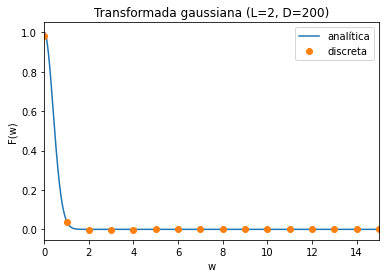

In [72]:
f=np.linspace(0,N/L,10000)     # puntos de frecuencias para graficar los coeficientes teoricos
W=np.exp(-np.pi*f**2)           # Coeficientes teoricos
N=D/2
F=np.arange(0,N/L+0.01,2/L)    # puntos de frecuencias para graficar los coeficientes calculados computacionalmente
plt.plot(f,W,label='analítica')
plt.plot(F,np.real(b)*L,'o',label='discreta')
plt.title('Transformada gaussiana (L=2, D=200)')
plt.xlabel('w')
plt.ylabel('F(w)')
plt.xlim([0,15]) #restringimos el ancho de banda para que se vea bien la función
plt.legend();

Ahora, para obtener el espectro de Fourier de la función de Gabor aplico el teorema de modulación, de forma que los coeficientes $b(k)$ los redefiniré como $c(k)$, de manera que obtenga los coeficientes de Fourier de la función de Gabor. Es decir, $$c(k) = \frac{b(k-f_0) + b(k+f_0)}{2}$$

In [73]:
f0=5
c=np.zeros(51,dtype=complex)
k=0
for k in range(46):
    c[k]=(b[k-f0] + b[k+f0])/2

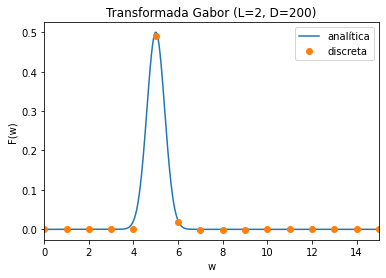

In [74]:
f=np.linspace(0,N/L,10000)     # puntos de frecuencias para graficar los coeficientes teoricos
W=(1/2)*np.exp(-np.pi*(f+f0)**2)+(1/2)*np.exp(-np.pi*(f-f0)**2)           # Coeficientes teoricos pag 397 Bracewell
N=D/2
F=np.arange(0,N/L+0.01,2/L)    # puntos de frecuencias para graficar los coeficientes calculados computacionalmente
plt.plot(f,W,label='analítica')
plt.plot(F,np.real(c)*L,'o',label='discreta')
plt.title('Transformada Gabor (L=2, D=200)')
plt.xlabel('w')
plt.ylabel('F(w)')
plt.xlim([0,15]) #restringimos el ancho de banda para que se vea bien la función
plt.legend();

Se puede ver que encajan relativamente bien los resultados teóricos con los obtenidos mediante la DFT discreta.

12.2 Use the Scaling Theorem to determine the Fourier spectrum of a Gabor function with variable width, defined by $$h(x) = e^{-\pi (x/\sigma)^2} cos(2 \pi f_0 x)$$ ($\sigma$ is width parameter)

Verify your result with MATLAB for the case $\sigma = 0.5$.

Para resolver el ejercicio voy a calcular la transformada de Fourier de la Gaussiana y le voy a aplicar el teorema de escalado (Scaling theorem), ya que según este teorema tenemos: $$g(x/\sigma) \longleftrightarrow |\sigma|G(f \cdot \sigma)$$

Además, aplicando el teorema de modulación, como en el apartado anterior, se obtendrá: $$g(x/\sigma)cos(2 \pi f_0 x) \longleftrightarrow |\sigma| \frac{G(f \cdot \sigma - f_0) + G(f \cdot \sigma + f_0)}{2}$$

In [75]:
def gauss(x):
    return np.exp(-np.pi*x**2)

Para aprovechar el código del Homework 11, tomo L=2 (longitud del intervalo) y D=200 (puntos que se toman).

In [76]:
L=2     # Longitud del intervalo
D=200   # Numero de puntos que se toman
g=np.zeros(D)    # Vector en el que se van a almacenar los puntos de la funcion
x=np.linspace(-L/2,L/2,D)   # D Puntos de la funcion en el intervalo -L/2 a L/2

for i in range(D):
    g[i]=gauss(x[i])

In [77]:
coeff=ft2(g,1)

In [78]:
N=D/2
a=np.zeros(101,dtype=complex)  # para coger los C_k con k positivo
a[0]=coeff[0]
h=1
for i in range(1,D):
    if (i%2==1):
        a[h]=coeff[i]
        h=h+1
        
b=np.zeros(51,dtype=complex) # para quitarme los coeficientes que reconstruyen la función opuesta
k=0
for i in range(50):
    if (i%2==0):
        b[k]=a[i]
        k=k+1

Ahora, para obtener el espectro de Fourier de la función de Gabor aplico el teorema de escalado y el de modulación, de forma que los coeficientes $b(k)$ los redefiniré como $c(k)$, de manera que obtenga los coeficientes de Fourier de la función de Gabor. Es decir, $$c(k) = |\sigma|\frac{b(k \cdot \sigma -f_0) + b(k \cdot \sigma +f_0)}{2}$$

In [79]:
f0=5
sigma=0.5
c=np.zeros(51,dtype=complex) # para quitarme los coeficientes que reconstruyen la función opuesta
k=0
for k in range(46):
    c[k]=abs(sigma)*(b[k*sigma-f0] + b[k*sigma+f0])/2

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

Para intentar dar una solución al problema de no poder meter $\sigma$ en $b(k)$, ya que solo se pueden coger coeficientes enteros he hecho lo siguiente:

In [80]:
f0=5
sigma=0.5
c=np.zeros(51,dtype=complex) # para quitarme los coeficientes que reconstruyen la función opuesta
k=0
for k in range(46):
    if (k%2==0):
        m=int(k*sigma)
        c[k]=abs(sigma)*(b[m-f0] + b[m+f0])/2
    else:
        c[k]=0
c

array([-6.47487272e-05-1.02551909e-05j,  0.00000000e+00+0.00000000e+00j,
       -4.49433355e-05-8.57339976e-06j,  0.00000000e+00+0.00000000e+00j,
       -3.28669895e-05-7.34664256e-06j,  0.00000000e+00+0.00000000e+00j,
       -2.49758168e-05-6.41269982e-06j,  0.00000000e+00+0.00000000e+00j,
       -1.95420362e-05-5.67748636e-06j,  0.00000000e+00+0.00000000e+00j,
        1.22896813e-01-5.08302570e-06j,  0.00000000e+00+0.00000000e+00j,
        4.65153014e-03+1.41989277e-04j,  0.00000000e+00+0.00000000e+00j,
       -3.69225475e-04-2.67440791e-05j,  0.00000000e+00+0.00000000e+00j,
       -1.83124442e-04-2.02998491e-05j,  0.00000000e+00+0.00000000e+00j,
       -1.07947432e-04-1.62112951e-05j,  0.00000000e+00+0.00000000e+00j,
       -7.11295285e-05-1.35063716e-05j,  0.00000000e+00+0.00000000e+00j,
       -5.04260434e-05-1.15875439e-05j,  0.00000000e+00+0.00000000e+00j,
       -3.76058825e-05-1.01492161e-05j,  0.00000000e+00+0.00000000e+00j,
       -2.90920287e-05-9.02492729e-06j,  0.00000000

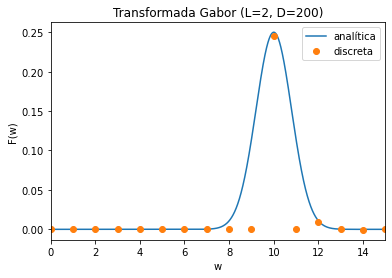

In [81]:
f=np.linspace(0,N/L,10000)     # puntos de frecuencias para graficar los coeficientes teoricos
W=abs(sigma)*((1/2)*np.exp(-np.pi*(f*sigma+f0)**2)+(1/2)*np.exp(-np.pi*(f*sigma-f0)**2))           # Coeficientes teoricos pag 397 Bracewell
N=D/2
F=np.arange(0,N/L+0.01,2/L)    # puntos de frecuencias para graficar los coeficientes calculados computacionalmente
plt.plot(f,W,label='analítica')
plt.plot(F,np.real(c)*L,'o',label='discreta')
plt.title('Transformada Gabor (L=2, D=200)')
plt.xlabel('w')
plt.ylabel('F(w)')
plt.xlim([0,15]) #restringimos el ancho de banda para que se vea bien la función
plt.legend();

Se puede apreciar que la transformada discreta que he hecho no se corresponde con la que se obtendría de forma analítica, esto creo que se debe a que no he podido meter $\sigma$ en $b(k)$, ya que solo se pueden coger coeficientes enteros y he representado sólo los coeficientes cuando $\sigma \cdot k =$ par, de forma que hay ceros donde no debería.

12.3 Write a general-purpose MATLAB program to convolve two vectors using the "shift, inner product" method. Hint: the MATLAB function fliplr.m flips a vector from left-to-right. Use your program to find the response of a linear filter with the following impulse response function:

Input #1 to filter is: delta function at time t=10.

Input #2 to filter is: sinc(x)=sinπx/πx

Verify your solution to the problem with MATLAB's built-in function conv.m

El método consiste en aplicar directamente la definición de una convolución, es decir, 
$$y[n]=...+x[-1]h[n+ 1]+x[0]h[n]+x[1]h[n−1]+x[2]h[n−2]+...$$

In [82]:
def conv(h,x):
    H = len(h)
    M = len(x)
    N = H+M-1 #longitud de la convolución final
    y = np.empty(N) #preparamos la lista de valores
    for n in np.arange(N):
        sumatorio = 0 #iniciamos el sumatorio en 0
        for k in np.arange(M):
            if 0 <= n-k <= H-1:
                # no tenemos en cuenta los valores que excedan el rango de x
                sumatorio += x[k] * h[n-k]
        y[n] = sumatorio
    return y

Introduzo dos vectores para comprobar que funciona.

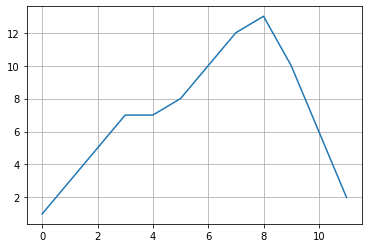

In [83]:
x = np.array([1.0,2.0,2.0,1.0])
h = np.array([1.0, 1.0, 1.0, 2.0, 0.0, 3.0, 2.0, 2.0, 2.0])

plt.plot(conv(x,h));
plt.grid();

Compruebo con la función de python convolve.

In [84]:
conv(x,h) == np.convolve(x,h)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

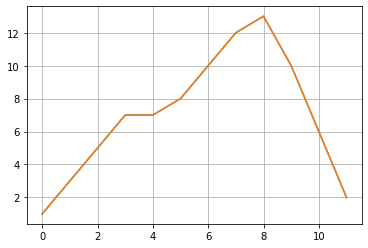

In [85]:
plt.plot(conv(x,h));
plt.plot(np.convolve(x,h));
plt.grid();

Para representar la Delta de Dirac en t=10, voy a tomar una función cuadrada con anchura muy pequeña, tendiendo a 0.

In [121]:
def rect(x):
    return 1 if 9.9<=x<=10.1 else 0

In [122]:
def sinc(x):
    return np.sin(np.pi*x)/(np.pi*x)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

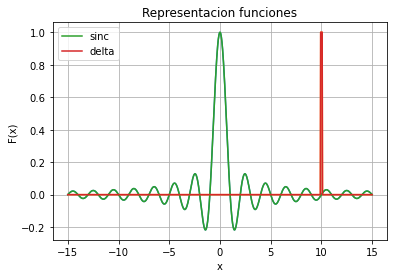

In [123]:
L=15     # Longitud del intervalo
D=1000   # Numero de puntos que se toman
f=np.zeros(D)    # Vector en el que se van a almacenar los puntos de la funcion
g=np.zeros(D)    # Vector en el que se van a almacenar los puntos de la funcion
x=np.linspace(-L,L,D)   # D Puntos de la funcion en el intervalo -L/2 a L/2

for i in range(D):
    f[i]=sinc(x[i])
    g[i]=rect(x[i])
print(g)

plt.plot(x,f);
plt.plot(x,g);
plt.plot(x,f,label='sinc')
plt.plot(x,g,label='delta')
plt.title('Representacion funciones')
plt.xlabel('x')
plt.ylabel('F(x)')
#plt.xlim([0,15]) #restringimos el ancho de banda para que se vea bien la función
plt.legend();
plt.grid();

In [124]:
def conv(h,x):
    H = len(h)
    M = len(x)
    N = H+M-1 #longitud de la convolución final
    y = np.empty(N) #preparamos la lista de valores
    for n in np.arange(N):
        sumatorio = 0 #iniciamos el sumatorio en 0
        for k in np.arange(M):
            if 0 <= n-k <= H-1:
                # no tenemos en cuenta los valores que excedan el rango de x
                sumatorio += x[k] * h[n-k]
        y[n] = sumatorio
    return y

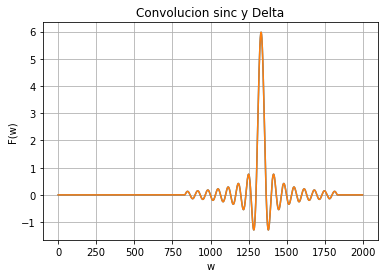

In [126]:
plt.plot(conv(f,g));
plt.plot(np.convolve(f,g));
plt.title('Convolucion sinc y Delta')
plt.xlabel('w')
plt.ylabel('F(w)')
#plt.xlim([0,15]) #restringimos el ancho de banda para que se vea bien la función
plt.grid();

Represento la función impulso-respuesta del filtro lineal:

In [127]:
def filtro(x):
    if 0<=x<=5:
        return x
    if 5<x<=15:
        return (-1/2)*x+7.5
    else:
        return 0

Convolución Filtro con la Delta de Dirac en t=10.

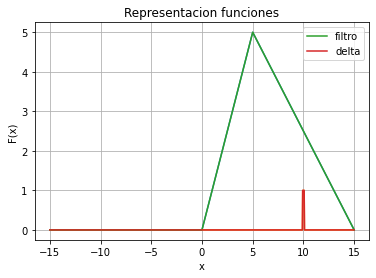

In [128]:
L=15     # Longitud del intervalo
D=1000   # Numero de puntos que se toman
f=np.zeros(D)    # Vector en el que se van a almacenar los puntos de la funcion
g=np.zeros(D)    # Vector en el que se van a almacenar los puntos de la funcion
x=np.linspace(-L,L,D)   # D Puntos de la funcion en el intervalo -L/2 a L/2

for i in range(D):
    f[i]=filtro(x[i])
    g[i]=rect(x[i])

plt.plot(x,f);
plt.plot(x,g);
plt.plot(x,f,label='filtro')
plt.plot(x,g,label='delta')
plt.title('Representacion funciones')
plt.xlabel('x')
plt.ylabel('F(x)')
#plt.xlim([0,15]) #restringimos el ancho de banda para que se vea bien la función
plt.legend();
plt.grid();

In [129]:
def conv(h,x):
    H = len(h)
    M = len(x)
    N = H+M-1 #longitud de la convolución final
    y = np.empty(N) #preparamos la lista de valores
    for n in np.arange(N):
        sumatorio = 0 #iniciamos el sumatorio en 0
        for k in np.arange(M):
            if 0 <= n-k <= H-1:
                # no tenemos en cuenta los valores que excedan el rango de x
                sumatorio += x[k] * h[n-k]
        y[n] = sumatorio
    return y

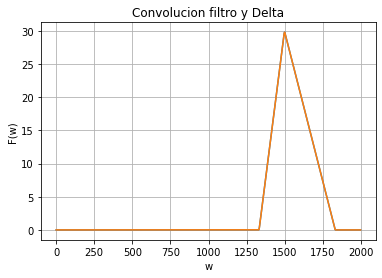

In [131]:
plt.plot(conv(f,g));
plt.plot(np.convolve(f,g));
plt.title('Convolucion filtro y Delta')
plt.xlabel('w')
plt.ylabel('F(w)')
plt.grid();

Convolución Filtro con la función sinc.

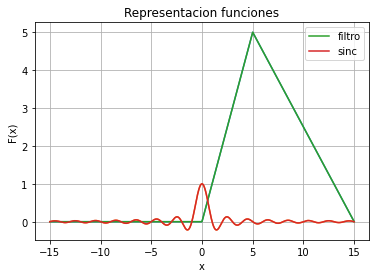

In [132]:
L=15     # Longitud del intervalo
D=1000   # Numero de puntos que se toman
f=np.zeros(D)    # Vector en el que se van a almacenar los puntos de la funcion
g=np.zeros(D)    # Vector en el que se van a almacenar los puntos de la funcion
x=np.linspace(-L,L,D)   # D Puntos de la funcion en el intervalo -L/2 a L/2

for i in range(D):
    f[i]=filtro(x[i])
    g[i]=sinc(x[i])

plt.plot(x,f);
plt.plot(x,g);
plt.plot(x,f,label='filtro')
plt.plot(x,g,label='sinc')
plt.title('Representacion funciones')
plt.xlabel('x')
plt.ylabel('F(x)')
#plt.xlim([0,15]) #restringimos el ancho de banda para que se vea bien la función
plt.legend();
plt.grid();

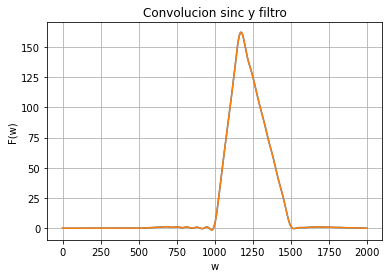

In [133]:
plt.plot(conv(f,g));
plt.plot(np.convolve(f,g));
plt.title('Convolucion sinc y filtro')
plt.xlabel('w')
plt.ylabel('F(w)')
plt.grid();

12.4 Use Bracewell's pictorial dictionary of Fourier transforms to find the spectrum of a Gaussian waveform exp(-πx2) passed through a perfect low-pass filter that has impulse response sinc(x)=sinπx/πx.

In [134]:
def gauss(x):
    return np.exp(-np.pi*x**2)

In [135]:
def sinc(x):
    return np.sin(np.pi*x)/(np.pi*x)

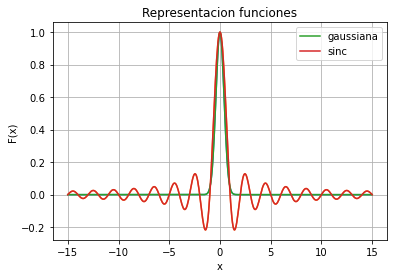

In [136]:
L=15     # Longitud del intervalo
D=500   # Numero de puntos que se toman
f=np.zeros(D)    # Vector en el que se van a almacenar los puntos de la funcion
g=np.zeros(D)    # Vector en el que se van a almacenar los puntos de la funcion
x=np.linspace(-L,L,D)   # D Puntos de la funcion en el intervalo -L/2 a L/2

for i in range(D):
    f[i]=gauss(x[i])
    g[i]=sinc(x[i])

plt.plot(x,f);
plt.plot(x,g);
plt.plot(x,f,label='gaussiana')
plt.plot(x,g,label='sinc')
plt.title('Representacion funciones')
plt.xlabel('x')
plt.ylabel('F(x)')
#plt.xlim([0,15]) #restringimos el ancho de banda para que se vea bien la función
plt.legend();
plt.grid();

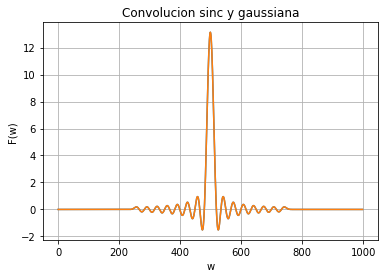

In [137]:
s=np.convolve(f,g)
plt.plot(conv(f,g));
plt.plot(np.convolve(f,g));
plt.title('Convolucion sinc y gaussiana')
plt.xlabel('w')
plt.ylabel('F(w)')
plt.grid();

In [138]:
coeff=ft2(s,1)

In [139]:
N=D/2
a=np.zeros(251,dtype=complex)  # para coger los C_k con k positivo
a[0]=coeff[0]
h=1
for i in range(1,D):
    if (i%2==1):
        a[h]=coeff[i]
        h=h+1
        
b=np.zeros(126,dtype=complex) # para quitarme los coeficientes que reconstruyen la función opuesta
k=0
for i in range(125):
    if (i%2==0):
        b[k]=a[i]
        k=k+1

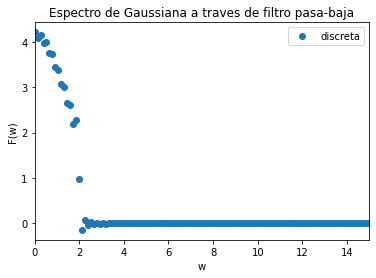

In [140]:
N=D/2
F=np.arange(0,N/L+0.01,2/L)    # puntos de frecuencias para graficar los coeficientes calculados computacionalmente
plt.plot(F,np.real(b)*L,'o',label='discreta')
plt.title('Espectro de Gaussiana a traves de filtro pasa-baja')
plt.xlabel('w')
plt.ylabel('F(w)')
plt.xlim([0,15]) #restringimos el ancho de banda para que se vea bien la función
plt.legend();